We will use the athlete data from the previous noptebook. 
Load it into 2 arrays again. 

In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

# Cumulative Distributions
# 累积分布

We've looked at distributions via histograms and saw that the distribution gives us quite a bit of information on what our data looks like. We can see the range of the data, where the density peaks, if the data follows a standard pattern, etc... Distributions are one of the fundamental descriptors of our data that we'll use for many purposes going forward. 
我们已经通过直方图查看了分布，并看到分布为我们提供了大量关于数据外观的信息。我们可以看到数据的范围、密度峰值的位置、数据是否遵循标准模式等……分布是我们数据的基本描述符之一，我们将在未来用于许多目的。

We can also look at another view of the distribution of the data - the cumulative distribution. The cumulative distribution shows us an accumulative total of the distribution of our data, or what fraction of the data is less than a certain point. 
我们还可以看一下数据分布的另一种观点——累积分布。累积分布向我们展示了数据分布的累积总数，或者数据的哪一部分小于某个点。

### Arrays数组   https://docs.python.org/zh-cn/3/library/array.html

For this example we'll also use a different data structure to a dataframe to hold our data - an array. Arrays are a very common data structure, we can think of it roughly like a numbered list of items. 对于这个例子，我们还将使用与数据帧不同的数据结构来保存我们的数据 - 一个数组。数组是一种非常常见的数据结构，我们可以粗略地把它想象成一个编号的项目列表。

We'll need to use arrays for some things later on, we're looking at them here just to get an introduction. One cool thing about much of the functionality that we'll use is that many functions can accept data in many different formats - dataframes数据帧, series序列, arrays数组, lists列表, and more! All of these data structures have, to different degrees, overlapping characteristics - here the important characteristic is that they are all iterable, or they all hold things in something that can be treated like a "list of things". Because of this, we can feed in data that is in any of these data structures interchangeably and get the same results. We need to build our comfort level in using data that is stored differently. 
稍后我们将需要使用数组来做一些事情，我们在这里查看它们只是为了进行介绍。关于我们将使用的大部分功能的一件很酷的事情是，许多函数可以接受许多不同格式的数据——数据帧、序列、数组、列表等等！所有这些数据结构都具有不同程度的重叠特征——这里的重要特征是它们都是可迭代的，或者它们都将事物保存在可以被视为“事物列表”的东西中。因此，我们可以互换地输入任何这些数据结构中的数据并获得相同的结果。我们需要提高使用不同存储数据的舒适度。

In [2]:
# PLEASE TAKE A LOOK AT THE NOTE IN THE COMMENTS IN THIS BLOCK.
# 请查看本版块评论中的注释。
dfNBA = pd.read_csv("data/NBA.csv")
dfNFL = pd.read_csv("data/NFL.csv")

# Take the height column and make a Series (effectively a 1D dataframe), with only 1 column:
# 取高度列并制作一个系列（实际上是一维数据框），只有 1 列
nba = dfNBA["Height"]
nfl = dfNFL["Height (inches)"]

#################################################################
# Note: Originally when I showed this, the above two lines were slightly different. 
# # 注意：最初当我展示这个时，上面的两行略有不同。
# They were (with the A added, obviously):
# 它们是（显然添加了 A）：

nbaA = np.array(dfNBA["Height"])   #等于说是建立了名字叫做nbaA的数组内容是身高
nflA = np.array(dfNFL["Height (inches)"])

# This code makes a slightly different data structure - a numpy array. 
# 这段代码创建了一个稍微不同的数据结构——一个 numpy 数组。
# An array is a 1D data structure - effectively just a big list. 
# 数组是一维数据结构——实际上只是一个大列表。
# The code below works basically the same with either. That's because both are "iterable"
# 下面的代码与任何一个都基本相同。那是因为两者都是“可迭代的”
# That means (basically), something that has can give values one at a time.
# 这意味着（基本上），有的东西可以一次给出一个值。
# Functions below can take either, with little/no change, or they can take a pandas Series
# 下面的函数可以采用任何一种，几乎/没有变化，或者它们可以采用熊猫系列
# Which is kind of a pandas take on an array. I point this out for a few reasons:
# 这是熊猫对数组的一种。我指出这一点有几个原因：
#  - Examples will sometimes show different data structures, and the rest of the code doesn't really change.
# - 示例有时会显示不同的数据结构，其余代码并没有真正改变。
#  - Some things will need other data structures, most notably ML needs arrays. 
# - 有些东西需要其他数据结构，最值得注意的是 ML 需要数组。
# We don't need to understand the problem differently when different data structures are used.
# 在使用不同的数据结构时，我们不需要对问题有不同的理解。
# It is basically like getting groceries with a bin, a reusable bag, or a plastic bag.
# 这基本上就像用垃圾桶、可重复使用的袋子或塑料袋买杂货一样。
# The all allow us to do the same thing (grocery shop/Machine Learn), and they can be used
# all 允许我们做同样的事情（杂货店/机器学习），它们可以被使用
# Largely interchabably. Sometimes one is better than the other for a specific task. 
# 很大程度上可以互换。有时，对于特定任务，一个比另一个更好。
# This type of thing is very common - you can do anything you want in code, so there are almost
# 这种事情很常见——你可以在代码中做任何你想做的事情，所以几乎有
# Always more than one way to do something. Flexible, but confusing.
# 做某事的方式总是不止一种。灵活，但令人困惑。

# Dump the non-numbers
nba = nba[~np.isnan(nba)]
nfl = nfl[~np.isnan(nfl)]

#### Data Structures and Basic Statistics
#### 数据结构和基本统计

No matter the type of data structure, the statistics that describe it remain the same. 
无论数据结构的类型如何，描述它的统计数据都保持不变。

We are used to the Pandas statistic functions - these are functions that are built into the Pandas Dataframe objects, we can tell by the syntax of "dataframe.function()". These functions "belong" to the dataframe, so they only work with that object. 
我们已经习惯了 Pandas 的统计函数——这些是内置在 Pandas Dataframe 对象中的函数，我们可以通过“dataframe.function()”的语法来判断。这些函数“属于”数据框，因此它们仅适用于该对象。

In [ ]:
#dataframe.function() 数据.想用的方程（）

In [3]:
dfNFL["Weight (lbs)"].mean(), dfNFL["Weight (lbs)"].std()

(229.22066468080135, 42.73273161153381)

In [4]:
dfNFL.columns

Index(['Age', 'Birth Place', 'Birthday', 'College', 'Current Status',
       'Current Team', 'Experience', 'Height (inches)', 'High School',
       'High School Location', 'Name', 'Number', 'Player Id', 'Position',
       'Weight (lbs)', 'Years Played'],
      dtype='object')

On the other hand, arrays are not Pandas Dataframes, so they don't have those functions available to them. To get stats like the mean we need to use a different function. If we look at the function calls below they are in the format "numpy.function()" - this is an indicator that the function is not something that "belongs" to the data structure object itself, rather the function can be called with any data that we provide as an argument. 
另一方面，数组不是 Pandas Dataframe，因此它们没有可用的这些功能。为了得到像平均值这样的统计数据，我们需要使用不同的函数。如果我们查看下面的函数调用，它们的格式为“numpy.function()”——这表明该函数不是“属于”数据结构对象本身的东西，而是可以使用任何我们作为参数提供的数据。

This distinction is minor now, but will become more clear and relevant as you get experience programming. 
这种区别现在很小，但随着您获得编程经验，它会变得更加清晰和相关。

In [ ]:
#numpy.function() NumPy这个词来源于两个单词-- Numerical 和 Python 。 NumPy提供了大量的库函数和操作，可以帮助程序员轻松地进行数值计算

** str() 函数将对象转化为适于人阅读的形式 
class str(object='')
参数
object -- 对象。**

In [5]:
#Check the means
print("NBA Mean Height: "+str(np.mean(nba)))
print("NFL Mean Height: "+str(np.mean(nfl)))

NBA Mean Height: 197.44075829383885
NFL Mean Height: 73.50839891929989


#### Applying Functions#### 应用函数

One thing that is often useful is to do bulk actions on our data, for example to convert between cm and inches. Rather than trying to do something complex like loop through each row of the data and generate the calculation, we can state the calculation and tell our program to apply it to every row. 

This apply function will have the effect of applying whatever calculation defined (x * 2.54) to each item in that array. 

通常有用的一件事是对我们的数据执行批量操作，例如在厘米和英寸之间进行转换。与其尝试做一些复杂的事情，比如遍历每一行数据并生成计算，我们可以陈述计算并告诉我们的程序将其应用于每一行。

此 apply 函数将具有将定义的任何计算 (x * 2.54) 应用于该数组中的每个项目的效果。

In [6]:
#Correct the heights to cm, so they are the same as NBA #把身高改成cm，这样就和NBA一样了
#This .apply() applies the function inside to an entire DF #This .apply() 将内部函数应用到整个 DF
#The "lambda x" basically means "grab each row one by one, and that row is (temporarily) x" #“lambda x”的基本意思是“一一抓取每一行，那一行是（暂时的）x”
#The part after the colon means "take x, and do this to it" #冒号后面的部分意思是“取x，对它做这个”
#So this will, more or less, grab each row, and do the function after the colon, one row at a time.#所以这或多或少会抓取每一行，并在冒号之后执行函数，一次一行。
nfl = nfl.apply(lambda x: x*2.54)
#nfl= nfl* 2.54
nfl


0        180.34
1        177.80
2        187.96
3        185.42
4        195.58
          ...  
17167    180.34
17168    190.50
17169    182.88
17170    185.42
17171    185.42
Name: Height (inches), Length: 17026, dtype: float64

***#“lambda x”的基本意思是“一一抓取每一行，那一行是（暂时的）x”***

## Percentiles百分位数

The previous 2 methods of looking at the distribution showed us versions of "how many of X are Y" - e.g. how many players are 187cm tall. 
前两种查看分布的方法向我们展示了“X 中有多少是 Y”的版本——例如有多少球员身高187cm。

We may also want/need to look at cumulative measurements - "how many of X are over/under Y" - e.g. how many players are over 215cm, or under 172.523cm. Enter percentiles...
我们可能还希望/需要查看累积测量值——“有多少 X 超过/低于 Y”——例如有多少球员超过 215 厘米，或低于 172.523 厘米。输入百分位数...

Percentiles measure how far along the scale a value is - how many items a value is larger than, and the inverse, how many are higher than it. E.g. if you are in a class of 10 people, and you are the second tallest, you are in the 90th percentile of height - 90% of people in that sample are the same or shorter than you; the remaining 10% are taller. If you've been scored on a standardized test, you've probably gotten some kind of number like this. (The book has a more thorough explationation of percentile stuff)
百分位数衡量一个值在刻度上的距离——一个值大于多少个项目，反之，有多少个高于它。例如。如果你在一个有 10 人的班级中，并且你是第二高的，那么你在身高的第 90 个百分位 - 该样本中 90% 的人与你相同或比你矮；剩下的 10% 更高。如果你在标准化考试中得分，你可能得到了类似这样的数字。 （这本书对百分位的东西有更彻底的解释）

In order to calculate things, we need two functions that are basically inverses of eachother. Percentile rank takes in a value and calculates what percentile that is in. Percentile does the opposite, takes in a percentile, and calculates the value. (Read the book on this, it has the details)
Percentile rank: value->ranking on percentile scale. e.g. I scored 72%, and the function tells me I'm in the 80th percentile. 
percentile: ranking->value. e.g. I'm in the 64th percentile of my graduating class, that means I have a 3.1 GPA.

为了计算事物，我们需要两个基本上互为逆的函数。百分位数排名接受一个值并计算其中的百分位数。百分位数则相反，接受一个百分位数并计算该值。 （阅读这本书，它有详细信息）
百分位等级：价值->百分位等级。例如我得了 72%，函数告诉我我在第 80 个百分位。
百分位：排名->价值。例如我在毕业班的第 64 个百分位，这意味着我的 GPA 为 3.1。

https://blog.csdn.net/shandianke/article/details/77150474  evalcdf详解

In [7]:
#The percentile functions
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

### Visualizing a CDF### 可视化 CDF

The CDF is basically a different look at the percentile rank - given a value, how far "up the scale" are we.
CDF 基本上是对百分位等级的不同看法 - 给定一个值，我们“向上”有多远。

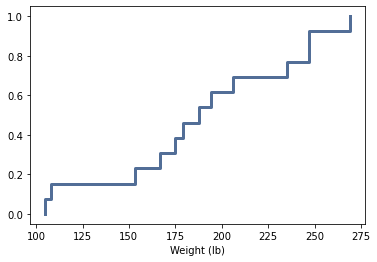

<Figure size 576x432 with 0 Axes>

In [8]:
#Simple dummy example
#Pretend these are weights in pounds
#简单的虚拟示例
#假设这些是以磅为单位的重量
sample = thinkstats2.Cdf([105,235,153,194,175,206,167,188,179,108,247,269,247])
thinkplot.Cdf(sample)
thinkplot.Show(xlabel="Weight (lb)")

We can read these CDF graphs like this... If I am 225lb, I can look that up on the x-axis. The corresponding y value is my percentile rank - I'm in apx the 70th percentile, or I'm heavier than about 70% of the people in the sample. 
我们可以像这样阅读这些 CDF 图……如果我是 225 磅，我可以在 x 轴上查看。相应的 y 值是我的百分位等级——我在第 70 个百分位，或者我比样本中大约 70% 的人重。

How does the shape of a CDF relate to the shape of a PDF? With different standard deviations? Create a CDF with the numbers 1-10, what does that look like? What can you infer about the distribution?
CDF 的形状与 PDF 的形状有何关系？有不同的标准差？用数字 1-10 创建一个 CDF，它是什么样的？你能从分布中推断出什么？

Create a CDF for both the NBA and NFL heights. How does that relate back to the histograms? 为 NBA 和 NFL 高度创建 CDF。这与直方图有什么关系？

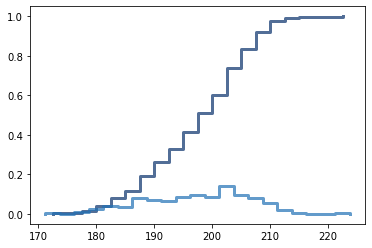

In [9]:
#Create and show CDF of NBA heights
pmf_nba = thinkstats2.Pmf(nba)
nba_cdf = thinkstats2.Cdf(nba)
thinkplot.Cdf(nba_cdf)
thinkplot.Pmf(pmf_nba)


{'xscale': 'linear', 'yscale': 'linear'}

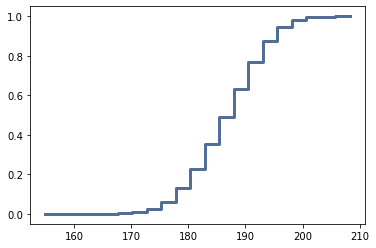

In [10]:
#Create and show CDF of NFL heights
nfl_cdf = thinkstats2.Cdf(nfl)
thinkplot.Cdf(nfl_cdf)

Ok, we can run some calculations. 好的，我们可以运行一些计算。

Make both into inches, round to 1 inch. The reason for this conversion and rounding is so that there are more results for each value because inches are "bigger". This isn't "needed", but it makes this more clear to visualize. 
把两者都做成英寸，圆形到1英寸。这种转换和舍入的原因是每个值都有更多的结果，因为英寸“更大”。这不是“需要的”，但它使可视化更加清晰。

In [11]:
# Convert to inches and make CDFs转换为英寸并制作 CDF
nbaIn = nba.apply(lambda x: x/2.54)
nflIn = nfl.apply(lambda x: x/2.54)
nbaIn = round(nbaIn, 0)
nflIn = round(nflIn, 0)
#Make CDF objects with the rounded stuff用圆形的东西制作CDF对象   就是四舍五入之后的值
nbaRounded = thinkstats2.Cdf(nbaIn)
nflRounded = thinkstats2.Cdf(nflIn)

In [12]:
nflIn.describe()

count    17026.000000
mean        73.508399
std          2.577632
min         61.000000
25%         72.000000
50%         74.000000
75%         75.000000
max         82.000000
Name: Height (inches), dtype: float64

In [13]:
nbaRounded.PercentileRank(73) 
#nbaRounded.PercentileRank(73)在那个位置 11%前 比较低                 百分位秩 就是求第73位

11.61137440758294

In [14]:
nbaRounded.Prob(100)
#nbaRounded.Prob 低于。。。 形容高过了多少                        

1.0

In [34]:
nbaRounded.Prob(100) #所占的比例

1.0

CDF是x的函数，其中x是可能出现在分布中的任意值。要获得某个特定值x的CDF(x)，需要计算出小于或等于x的值在此分布中所占的比例。

下面代码中的函数参数为一个序列t和一个值x，这个函数的结果为0到1的概率。

def EvalCdf(t, x):
    count = 0.0
    for value in t:
        if value <= x:
            count +=1
            
    prob = count / len(t)
    return prob


In [15]:
nbaRounded.Percentile(100)
#Percentile 百分比

88.0

In [16]:
nbaRounded.Value(.95)
#nbaRounded.Value(.95) 高于95% 需要多高

83.0

In [17]:
# Share of NBA between 71 inches and 75 inches.占比 
#nbaRound <- CDF object
nbaRounded.Prob(75) - nbaRounded.Prob(71)

0.22274881516587677

In [18]:
#Median Height?
print(nbaRounded.Value(.50))
print(np.median(nbaRounded. ValueArray()))

78.0
77.5


## Exercises

Try these! 

<ul>
<li> What is the probability that someone in the NBA is 80in tall?
<li> What is the probability someone is over 74in in the NFL?
<li> How tall does someone need to be to get into the 75th percentile in each dataset?
<li> What is your percentile rank in each dataset? 
</ul>

In [19]:
#E.g. What is the probability that someone in the NBA is 80in tallNBA中某人身高80英寸的概率是多少
nbaRounded.Prob(81) - nbaRounded.Prob(79)
#And if we want to see in in pretty printing
print(str(round(nbaRounded.Prob(81) - nbaRounded.Prob(79), 3)*100)+"%")

#And if someone is over 74in in the NFL?
#Think about why there's the extra math in there.
res = PercentileRank(nflIn, 74)
print(str(round((1-res), 1)*-1)+"%")

23.7%
62.3%


In [20]:
nflRounded

Cdf([61. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80.
 81. 82.], [5.87337014e-05 2.34934806e-04 5.28603313e-04 2.52554916e-03
 7.69411488e-03 2.52554916e-02 5.80876307e-02 1.30799953e-01
 2.27534359e-01 3.54281687e-01 4.89251733e-01 6.33208035e-01
 7.68530483e-01 8.74192412e-01 9.44966522e-01 9.81381417e-01
 9.94655233e-01 9.98355456e-01 9.99941266e-01 1.00000000e+00])

## Exercises

Try these! 

<ul>
<li> What is the probability that someone in the NBA is 80in tall?
<li> What is the probability someone is over 74in in the NFL?
<li> How tall does someone need to be to get into the 75th percentile in each dataset?
<li> What is your percentile rank in each dataset? 
</ul>

## 练习

试试这些！

<ul>
<li> NBA 中有人身高 80 英寸的概率是多少？
<li> 一个人在 NFL 中超过 74 英寸的概率是多少？
<li> 一个人需要多高才能进入每个数据集中的第 75 个百分位？
<li> 您在每个数据集中的百分位排名是多少？
</ul>

In [21]:
nbaRounded
nflRounded

Cdf([61. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80.
 81. 82.], [5.87337014e-05 2.34934806e-04 5.28603313e-04 2.52554916e-03
 7.69411488e-03 2.52554916e-02 5.80876307e-02 1.30799953e-01
 2.27534359e-01 3.54281687e-01 4.89251733e-01 6.33208035e-01
 7.68530483e-01 8.74192412e-01 9.44966522e-01 9.81381417e-01
 9.94655233e-01 9.98355456e-01 9.99941266e-01 1.00000000e+00])

In [22]:
#E.g. What is the probability that someone in the NBA is 80in tallNBA中某人身高80英寸的概率是多少
nbaRounded.Prob(81) - nbaRounded.Prob(79)
#And if we want to see in in pretty printing
print(str(round(nbaRounded.Prob(81) - nbaRounded.Prob(79), 3)*100)+"%")


23.7%


In [23]:

#And if someone is over 74in in the NFL?
#Think about why there's the extra math in there.
print(1-nflRounded.Prob(74))

0.36679196522964874


In [24]:
nbaRounded.Prob(80)
print(str(round(nbaRounded.Prob(80), 4)*100)+"%")

73.92999999999999%


In [25]:
res = PercentileRank(nflIn, 74)

In [26]:
#Using the Percentile/Rank functions, and the CDF functions on pg 49 of the book
#Can you look for anything interesting in the data?
#Who's over X, who's under? How you'd your height score on the scale?
#If someone is in the top 20% of NFL height, how to they rank in the NBA?
#How many people are shorter than you (or a friend) in either leauge?
#Using the Percentile/Rank functions, and the CDF functions on pg 49 of the book
#你能在数据中寻找有趣的东西吗？
#谁在X之上，谁在之下？你在体重秤上的身高分数如何？
#如果有人在NFL身高前20%，他们在NBA的排名如何？
#有多少人比你（或朋友）矮？

In [27]:
#If someone is in the top 20% of NFL height, how to they rank in the NBA?
#1. How tall is the top 20% in NFL
top_20_nfl=nflRounded.Percentile(80)

#2. what percentile rank is the above value in the NBA
nbaRounded.PercentileRank(top_20_nfl)

32.93838862559242

In [28]:
total = 0
i = 0 #从哪里开始
while i < 50: #x小于多少
    total+= nbaRounded.Sample(1) 
    i+=1
print(total)

[3939.]


In [29]:
for player in dfNBA:
    print(player['Name']), player["Height"]

TypeError: string indices must be integers

In [ ]:
fruits=['Bananna', "Apple", 'Orange', 'Grape']
for fruit in fruits:
    print("Duke's",fruit)

Duke's Bananna
Duke's Apple
Duke's Orange
Duke's Grape


In [ ]:
#nfl
for a in nfl:
    print(a/2.54)

71.0
70.0
74.0
73.0
77.0
73.0
73.0
77.0
70.0
76.0
69.0
74.0
71.0
73.0
73.0
74.0
74.0
68.0
74.0
72.0
79.0
75.0
75.0
74.0
73.0
76.0
72.0
78.0
77.0
74.0
74.0
70.0
75.0
71.0
76.0
72.0
70.0
72.0
77.0
70.0
74.0
72.0
77.0
75.0
74.0
71.0
70.0
76.0
69.0
77.0
74.0
70.0
76.0
74.0
68.0
74.0
71.0
70.0
78.0
69.0
73.0
74.0
76.0
76.0
74.0
78.0
74.0
74.0
75.0
78.0
76.0
74.0
76.0
77.0
68.0
71.0
76.0
70.0
75.0
71.0
72.0
72.0
74.0
79.0
76.0
74.0
73.0
70.0
72.0
73.0
78.0
73.0
74.0
73.0
76.0
75.0
71.0
74.0
74.0
75.0
76.0
71.0
77.0
72.0
74.0
76.0
74.0
73.0
75.0
73.0
71.0
71.0
73.0
74.0
77.0
77.0
75.0
73.0
79.0
75.0
70.0
75.0
73.0
71.0
77.0
75.0
76.0
80.0
77.0
68.0
73.0
74.0
71.0
73.0
75.0
73.0
73.0
70.0
76.0
71.0
74.0
76.0
75.0
77.0
78.0
77.0
76.0
71.0
73.0
78.0
70.0
72.0
74.0
72.0
77.0
69.0
78.0
68.0
74.0
79.0
73.0
75.0
75.0
80.0
70.0
77.0
74.0
74.0
71.0
76.0
71.0
74.0
70.0
75.0
73.0
71.0
73.0
73.0
71.0
70.0
73.0
75.0
75.0
76.0
75.0
77.0
73.0
72.0
72.0
75.0
74.0
78.0
75.0
72.0
73.0
72.0
75.0
75.0
73.0
71.0


008 有normal dist